In [48]:
##importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [49]:
dataset=pd.read_csv(r'C:\Users\priya\OneDrive\Documents\PROJECTS\Data_analytics\gold_price(randomforest)\archive (3).zip')

In [50]:
dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [51]:
dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [52]:
dataset.shape

(2290, 6)

In [53]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [54]:
dataset.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [55]:
dataset=dataset.drop(columns='Date',axis=1)

In [56]:
dataset.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


In [57]:
dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798



Correlation:

Positive Correlation(directly propotional)

Negative Correlation(inversely propotional)

In [58]:
# dataset['Date'] = pd.to_datetime(dataset['Date'], errors='coerce')
correlation = dataset.corr()

<Axes: >

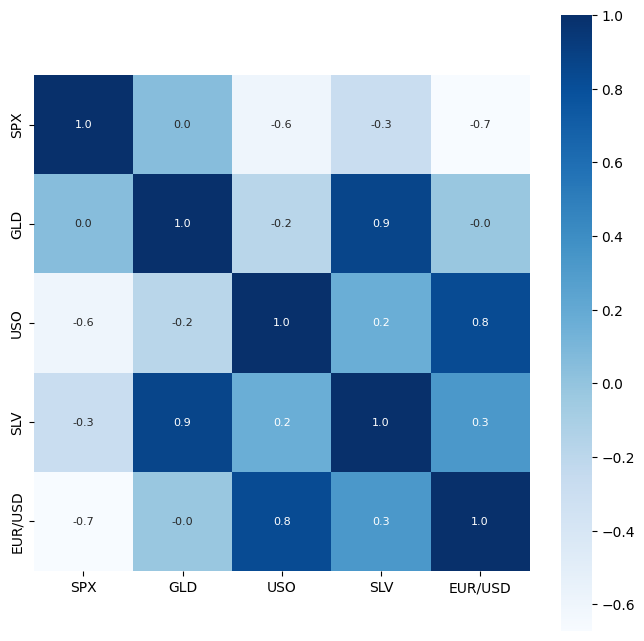

In [59]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

Darker(positive{directly}) and lighter(negative{inversely}) 

In [60]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\priya\AppData\Local\Temp\ipykernel_11032\4188005793.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

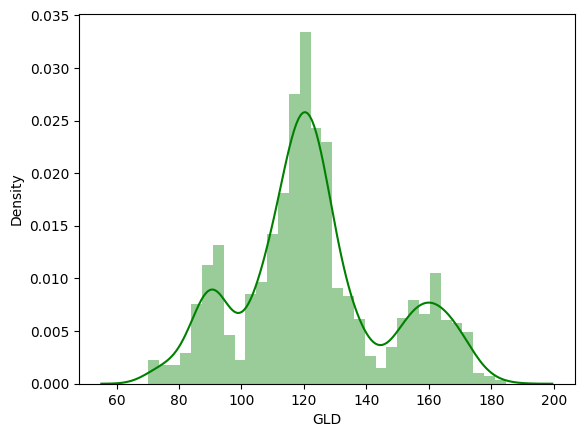

In [61]:
# checking the distribution of the GLD Price
sns.distplot(dataset['GLD'],color='green')

In [62]:
##spliting data into labels and target
X=dataset.drop(columns=['GLD'], axis=1)
Y=dataset['GLD']

In [64]:
##spliting into training data and test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [66]:
print(X.shape,X_train.shape,X_test.shape)

(2290, 4) (1832, 4) (458, 4)


In [67]:
model=RandomForestRegressor()

In [69]:
model.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [70]:
test_prediction=model.predict(X_test)

In [75]:
#R Square error
R_score=metrics.r2_score(Y_test,test_prediction)

In [76]:
print('R square Error: ',R_score)

R square Error:  0.989303246073198


In [77]:
### comapre actual values and predicted values in a plot
Y_test=list(Y_test)

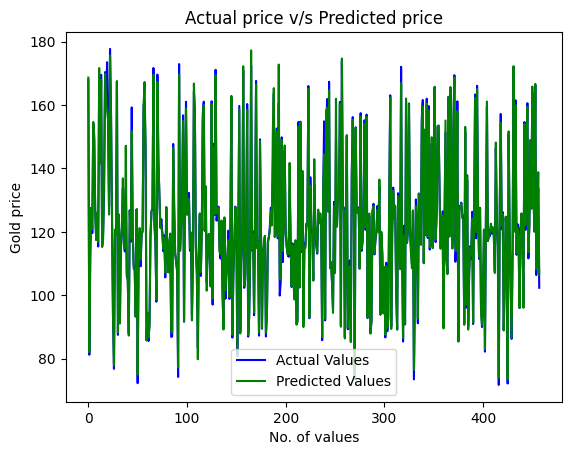

In [83]:
plt.plot(Y_test,color='blue', label='Actual Values')
plt.plot(test_prediction,color='green', label='Predicted Values')
plt.title('Actual price v/s Predicted price')
plt.xlabel('No. of values')
plt.ylabel('Gold price')
plt.legend()
plt.show()

In [84]:
##Building predictive system
input_data=(2671.919922,14.0600,15.5100,1.186789)
input_array=np.asarray(input_data)
input_reshaped=input_array.reshape(1,-1)

prediction=model.predict(input_reshaped)
print(prediction)


[123.9789969]


C:\Users\priya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
